In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import os
import warnings

In [30]:
warnings.filterwarnings("ignore")

In [31]:
os.getcwd()

'/Users/akankshamishra/Desktop/DataScience/Data sets'

In [32]:
os.chdir('/Users/akankshamishra/Desktop/DataScience/Data sets/')

# Data loading and cleaning

In [57]:
data = pd.read_csv("car_insurance.csv")

In [58]:
pd.set_option("display.max_columns",25)
data.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [61]:
df = data.copy()

In [62]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
ID            10302 non-null int64
KIDSDRIV      10302 non-null int64
AGE           10295 non-null float64
HOMEKIDS      10302 non-null int64
YOJ           9754 non-null float64
INCOME        9732 non-null object
PARENT1       10302 non-null object
HOME_VAL      9727 non-null object
MSTATUS       10302 non-null object
GENDER        10302 non-null object
EDUCATION     10302 non-null object
OCCUPATION    9637 non-null object
TRAVTIME      10302 non-null int64
CAR_USE       10302 non-null object
BLUEBOOK      10302 non-null object
TIF           10302 non-null int64
CAR_TYPE      10302 non-null object
RED_CAR       10302 non-null object
OLDCLAIM      10302 non-null object
CLM_FREQ      10302 non-null int64
REVOKED       10302 non-null object
MVR_PTS       10302 non-null int64
CLM_AMT       10302 non-null object
CAR_AGE       9663 non-null float64
CLAIM_FLAG    10302 non-null int64
d

Removing the $ and , from columns 'INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT' which are there in the dataframe



In [64]:
df.shape

(10302, 25)

In [65]:
# replace the $ symbol
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    df[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)


In [66]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,67349,No,0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,0,18.0,0
1,132761049,0,43.0,0,11.0,91449,No,257252,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,0,1.0,0
2,921317019,0,48.0,0,11.0,52881,No,0,z_No,M,Bachelors,Manager,26,Private,21970,1,Van,yes,0,0,No,2,0,10.0,0
3,727598473,0,35.0,1,10.0,16039,No,124191,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,306251,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,0,6.0,0


In [67]:
count = df["CLAIM_FLAG"].value_counts()
count

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64

In [68]:
#converting columns of df datatype float
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
for col in columns:
    df[col] = df[col].astype(float)
    

In [69]:
df.isnull().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

# Dealing with missing values

Dealing with the missing value is very important. If the feature is having less number of missing value we will remove the row which contain missing value. Also we are going to fill null value of the numerical variable with mean.



# Obervation:

-We can see that the features ['YOJ','OCCUPATION'] varies person to person. We can not deal with that type of missing value so we are going to remove the row from this column.

-AGE,CAR_AGE,INCOME and HOME_VAL contains the numerical values.

In [70]:
df[["YOJ","OCCUPATION","AGE","CAR_AGE","INCOME","HOME_VAL"]].head(50)

,YOJ,OCCUPATION,AGE,CAR_AGE,INCOME,HOME_VAL
0,11.0,Professional,60.0,18.0,67349.0,0.0
1,11.0,z_Blue Collar,43.0,1.0,91449.0,257252.0
2,11.0,Manager,48.0,10.0,52881.0,0.0
3,10.0,Clerical,35.0,10.0,16039.0,124191.0
4,14.0,z_Blue Collar,51.0,6.0,NaN,306251.0
5,NaN,Doctor,50.0,17.0,114986.0,243925.0
6,12.0,z_Blue Collar,34.0,7.0,125301.0,0.0
7,NaN,z_Blue Collar,54.0,1.0,18755.0,NaN
8,11.0,Manager,40.0,1.0,50815.0,0.0
9,12.0,z_Blue Collar,44.0,10.0,43486.0,0.0


In [71]:
columns = ["AGE","CAR_AGE","INCOME", "HOME_VAL"]
for col in columns:
    df[col].fillna(df[col].mean(),inplace=True)
    

In [72]:
df.dropna(inplace = True)


In [73]:
df.isnull().sum()

ID            0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
dtype: int64

# Converting the categorical values to numeric value:

We can see that some of the features of PARENT1, MSTATUS, GENDER, EDUCATION, OCCUPATION, CAR_USE, CAR_TYPE, RED_CAR and REVOKED in the data are textual in nature but any prediction model only work well in the numerical data so we need to convert that features into the numerical format.



In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
columns = ["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]

In [76]:

for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    

In [77]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,67349.000000,0,0.0,1,0,3,5,14,1,14230.0,11,0,1,4461.0,2,0,3,0.0,18.0,0
1,132761049,0,43.0,0,11.0,91449.000000,0,257252.0,1,0,4,7,22,0,14940.0,1,0,1,0.0,0,0,0,0.0,1.0,0
2,921317019,0,48.0,0,11.0,52881.000000,0,0.0,1,0,1,4,26,1,21970.0,1,4,1,0.0,0,0,2,0.0,10.0,0
3,727598473,0,35.0,1,10.0,16039.000000,0,124191.0,0,1,4,0,5,1,4010.0,4,5,0,38690.0,2,0,3,0.0,10.0,0
4,450221861,0,51.0,0,14.0,61572.073263,0,306251.0,0,0,0,7,32,1,15440.0,7,0,1,0.0,0,0,0,0.0,6.0,0


In [78]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,9.125000e+03,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000
mean,4.965588e+08,0.173479,44.703546,0.736438,10.414685,58020.701346,0.132822,149878.029068,0.399014,0.559562,2.086575,3.996603,33.532164,0.667945,15095.009315,5.317151,2.561753,0.276932,3998.687562,0.786740,0.123945,1.705973,1489.117699,7.921990,0.267068
std,2.866033e+08,0.511848,8.605753,1.125369,4.182551,42958.438237,0.339401,120694.206662,0.489722,0.496467,1.489758,2.467742,15.946287,0.470976,8060.876991,4.112808,1.988747,0.447507,8742.803680,1.146301,0.329537,2.164136,4560.864073,5.408019,0.442453
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.462770e+08,0.000000,39.000000,0.000000,9.000000,27684.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,22.000000,0.000000,8900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.984570e+08,0.000000,45.000000,0.000000,11.000000,53918.000000,0.000000,154523.018608,0.000000,1.000000,2.000000,4.000000,33.000000,1.000000,13950.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7.410604e+08,0.000000,51.000000,1.000000,13.000000,78609.000000,0.000000,227305.000000,1.000000,1.000000,4.000000,6.000000,44.000000,1.000000,20040.000000,7.000000,5.000000,1.000000,4582.000000,2.000000,0.000000,3.000000,1133.000000,11.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,1.000000,885282.000000,1.000000,1.000000,4.000000,7.000000,142.000000,1.000000,65970.000000,25.000000,5.000000,1.000000,57037.000000,5.000000,1.000000,13.000000,123247.000000,28.000000,1.000000


# Age and Gender

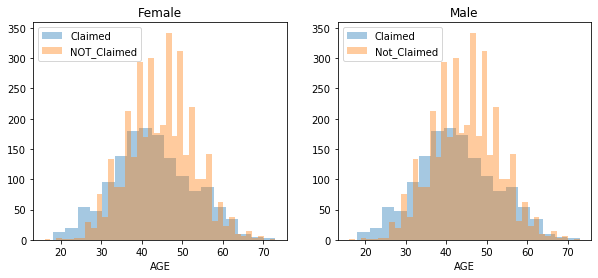

In [79]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['GENDER']==1]
men = df[df['GENDER']==1]
ax = sns.distplot(women[women['CLAIM_FLAG']==1].AGE, bins=18, label = "Claimed", ax = axes[0], kde =False)
ax = sns.distplot(women[women['CLAIM_FLAG']==0].AGE, bins=40, label = "NOT_Claimed", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['CLAIM_FLAG']==1].AGE, bins=18, label = "Claimed", ax = axes[1], kde = False)
ax = sns.distplot(men[men['CLAIM_FLAG']==0].AGE, bins=40, label = "Not_Claimed", ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

we can see that people who has not claimed insurance mostly between the age of 30 to 60

Text(0.5, 1.0, 'INCOME')

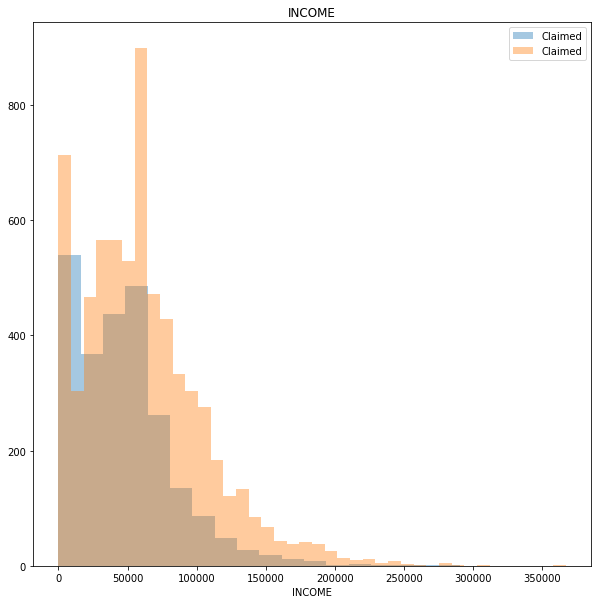

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 10))
ax = sns.distplot(df[df["CLAIM_FLAG"]==1]["INCOME"], bins=18, label = "Claimed", ax = axes, kde = False)
ax = sns.distplot(df[df["CLAIM_FLAG"]==0]["INCOME"], bins=40, label = "Claimed", ax = axes, kde = False)
ax.legend()
ax.set_title("INCOME")

Few people of high income have claimed insurance

In [82]:
data["EDUCATION"].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

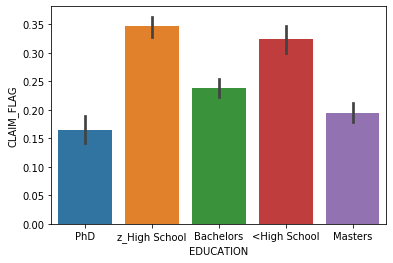

In [83]:
sns.barplot(x='EDUCATION', y='CLAIM_FLAG', data=data)

We can clearly see that high school people have highest probablity of claiming insurance.

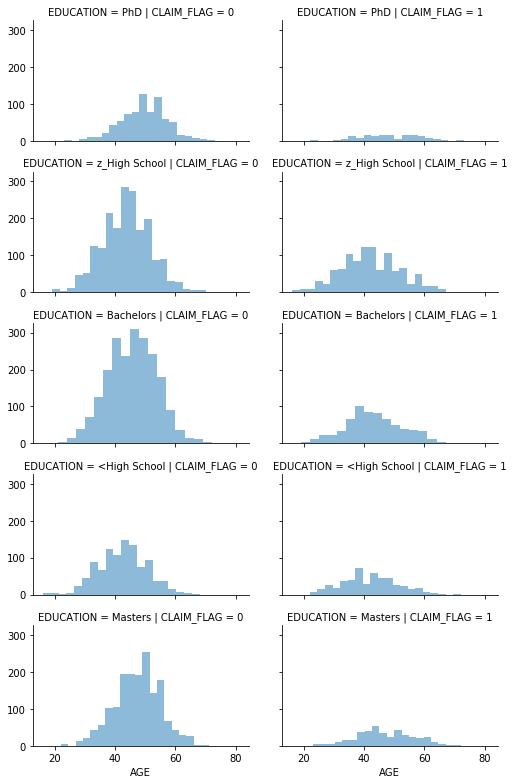

In [85]:
grid = sns.FacetGrid(data, col='CLAIM_FLAG', row='EDUCATION', size=2.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend();

In [86]:
data.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [87]:
data.CAR_USE.value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

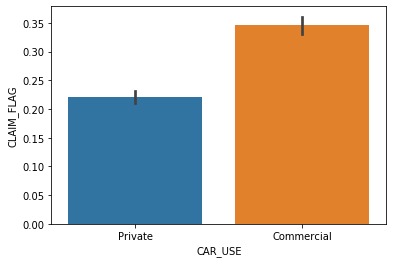

In [88]:
sns.barplot(x="CAR_USE", y='CLAIM_FLAG', data=data)

WE can see  that commercial use cars have higher probablity of claiming insurance than private cars


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

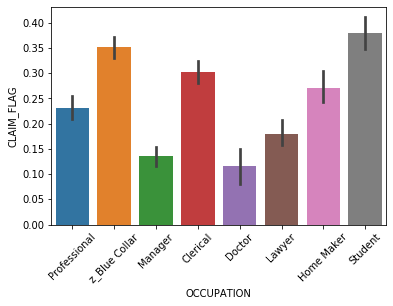

In [96]:

sns.barplot(x='OCCUPATION', y='CLAIM_FLAG', data=data )
plt.xticks(rotation=45)

# Normalising data

In [97]:
from sklearn.preprocessing import MinMaxScaler 

In [102]:
normalizer = MinMaxScaler()
normalizer.fit(df)
df = pd.DataFrame(normalizer.transform(df))
df.columns = data.columns

In [103]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,0.063527,0.0,0.676923,0.0,0.478261,0.183497,0.0,0.000000,1.0,0.0,0.75,0.714286,0.065693,1.0,0.197456,0.416667,0.0,1.0,0.078212,0.4,0.0,0.230769,0.0,0.677419,0.0
1,0.132716,0.0,0.415385,0.0,0.478261,0.249159,0.0,0.290588,1.0,0.0,1.00,1.000000,0.124088,0.0,0.208469,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.129032,0.0
2,0.921380,0.0,0.492308,0.0,0.478261,0.144078,0.0,0.000000,1.0,0.0,0.25,0.571429,0.153285,1.0,0.317512,0.000000,0.8,1.0,0.000000,0.0,0.0,0.153846,0.0,0.419355,0.0
3,0.727635,0.0,0.292308,0.2,0.434783,0.043699,0.0,0.140284,0.0,1.0,1.00,0.000000,0.000000,1.0,0.038933,0.125000,1.0,0.0,0.678332,0.4,0.0,0.230769,0.0,0.419355,0.0
4,0.450220,0.0,0.538462,0.0,0.608696,0.167758,0.0,0.345936,0.0,0.0,0.00,1.000000,0.197080,1.0,0.216225,0.250000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.290323,0.0


In [104]:
X = df.drop(["CLAIM_FLAG"],1)
y = df["CLAIM_FLAG"]

In [106]:
X_train,X_test,y_train,y_test = tts(X,y,random_state=6,test_size = 0.3)

# Prediction check

Using logistic regression to predict that whether the person is eligible for CLAIM. Here as bank employee our main focus is whether to give insurance to that person or not.



In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression(random_state = 6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)
precision = precision_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
class_repo = classification_report(y_test,y_pred)
print(score)
print(precision)
print(confusion_mat)
print(class_repo)

0.8469685902118335
0.882640586797066
[[1958   48]
 [ 371  361]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      2006
         1.0       0.88      0.49      0.63       732

    accuracy                           0.85      2738
   macro avg       0.86      0.73      0.77      2738
weighted avg       0.85      0.85      0.83      2738



# Dealing with Imbalnced data

As on the above task, we have seen that recall and f1-score is good for "0" class but not satisfactory for "1" class. So if I applied model on this dataset it will give us a bad prediction. To overcome this I need to use the technic Oversampling or Undersampling technic. Oversampling in data analysis is techniques used to adjust the class distribution of an imbalanced dataset. In this task, I am going to apply the SMOTE to adjust the class distribution of the data set. While working with the learning model, it is important to scale the features to a range which is centered around zero so that the variance of the features are in the same range. If the feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset and our model will not train well which gives us bad model. i already have done scaling part.

In [117]:
from imblearn.over_sampling import SMOTE

In [121]:
smote = SMOTE(random_state=9)
X_train,y_train = smote.fit_sample(X_train,y_train)

# Prediction Check after dealing with imbalanced data


In the previous task we applied the model without doing any operation on imbalanced data. Now going to apply Logistic regression and check the accuracy.

In [123]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)
confusion_mat = confusion_matrix(y_test,y_pred)
class_repo = classification_report(y_test,y_pred)
print(confusion_mat)
print(class_repo)

0.881300219138057
[[1813  193]
 [ 132  600]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92      2006
         1.0       0.76      0.82      0.79       732

    accuracy                           0.88      2738
   macro avg       0.84      0.86      0.85      2738
weighted avg       0.89      0.88      0.88      2738



now it is cleared that our accuracy is good for both classes